In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from datetime import datetime

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

from pandas_datareader import data as pdr
yf.pdr_override()

In [2]:
# current stock Interests: GPU, Car Scene with Tesla, Comparing companies such as Google, Microsoft, Amazon, and Meta, Streaming services such as Netflix etc...

# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#6.-Predicting-the-closing-price-stock-price-of-APPLE-inc: 

# Good Guide: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#4.-What-was-the-correlation-between-different-stocks-closing-prices? 

# Kaggle Dataset Stock History Choices this week: 
# Nvidia = https://www.kaggle.com/datasets/kalilurrahman/nvidia-stock-data-latest-and-updated (might be too much and only goes up to 2021)
# Tesla = https://www.kaggle.com/datasets/muhammadibrahimqasmi/tesla-stock-insights-and-predictions/data 
# Google = https://www.kaggle.com/datasets/muhammadibrahimqasmi/google-stock-dataset 

# Possible list of Stock apis: https://patrickalphac.medium.com/stock-api-landscape-5c6e054ee631
# Yahoo Finance?

# Current Stocks API: https://finnhub.io 

# S&P 500 Current stocks daily updated: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data 

In [3]:
# can do baseline data analysis for now but is suggested to use up to date data next week around
# Yahoo Finance?
# how to update csv file with api data

# Stock Market Analysis between AWS, Google, Amazon, Microsoft, Apple, Meta

# Analysis between CPU manufacturers Intel and AMD

# Nvidia

# Analysis betweenn E-Car Manufacturers, Tesla as one

In [4]:
stock = 'NVDA'

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [5]:
globals()[stock] = yf.download(stock, start, end)
df_nvidia = globals()[stock]

[*********************100%%**********************]  1 of 1 completed


## Data Cleaning

In [6]:
df_nvidia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,151.250000,152.467499,147.875000,148.367493,148.078003,20391200
2021-05-04,146.372498,146.375000,140.102493,143.512497,143.232483,40532400
2021-05-05,147.089996,148.134995,143.875000,144.585007,144.302917,29202400
2021-05-06,144.952499,145.712494,142.179993,145.229996,144.946625,19338000
2021-05-07,148.082504,149.707504,146.717499,148.122498,147.833481,22932800


In [7]:
df_nvidia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-26,838.179993,883.309998,833.869995,877.349976,877.349976,55101100
2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36370900
2024-05-01,850.770020,860.000000,812.549988,830.409973,830.409973,55986300
2024-05-02,844.489990,862.369995,832.000000,858.169983,858.169983,37647000


In [8]:
# Maybe grab the Date and highest price it was at during each date?
df_nvidia.info()

# Open: Opening Price of a stock, first price when stock market opens
# High: Highest price the stock was at during trading day
# Low: Lowest price the stock was at duirng trading day
# Close: Closing price of a stock, final price before trades close
# adj Close: this is the closing price of a stock adjusted for factors such as dividends, stock splits, and other corporate actions that may affect the price
# Volume: The total number of shares or contracts traded during the period

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2021-05-03 to 2024-05-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [9]:
df_nvidia.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Analysis

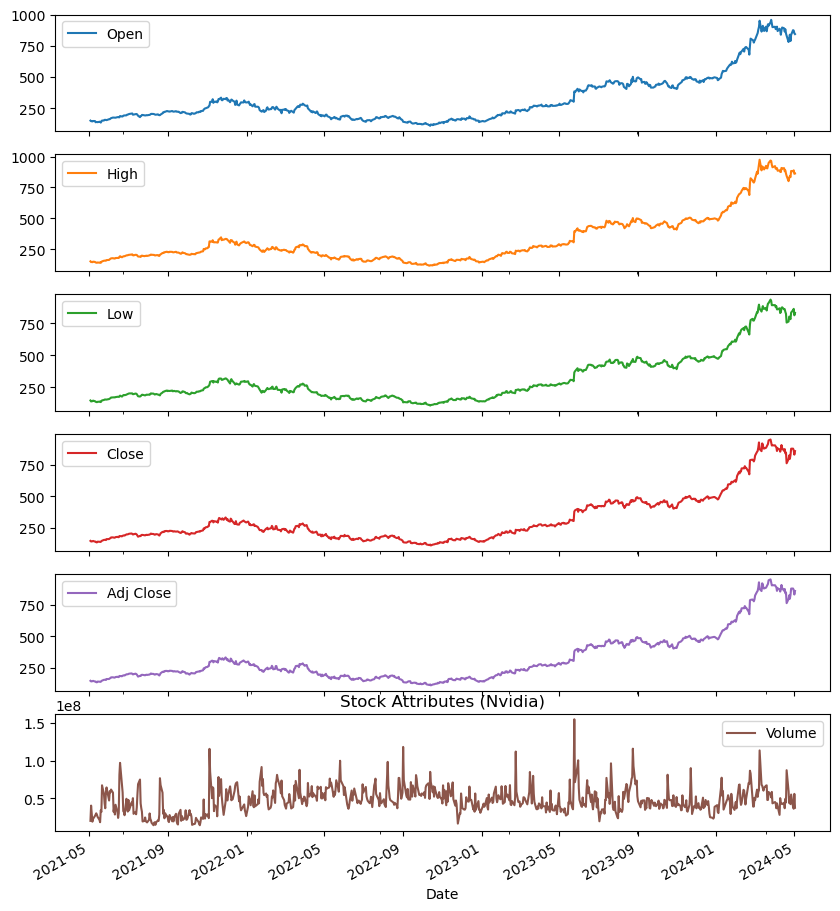

In [10]:
df_nvidia.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

It can be seen that the trends between all data points aside volume are largely the same. Little dilation from each other, this could mean that Nvidia has been on a steady rise throughout Covid but had a massive spike near 2024.

In [11]:
fig = px.line(df_nvidia, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

There was a spike in November 2021 that lines up with the rise of AI and ChatGPT. With GPUs being a major asset to running and processing AI. 

Judging from the chart, January 2022 to September 2022 was Nvidia's 52 week low after the US imposed restrictions on the export of AI chips to China and Russia. The 239% rise in 2023 would be due to the fervor over generative AI reaching a peak height. Nvidia skyrocketed again in 2024 over further AI demand. There are high chances that Nvidia may reach the $1000 stock price soon if it continues to rise. Right now residing between $900 to $800 per stock.

In [12]:
fig = px.line(df_nvidia, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

We see two noticeable spikes in trades in May 2023 and September 2020. December 2020 has the lowest time in trades between 2019 and 2024. In 2024, the high cost in the stock may be the reason as to why it is so low in trade volume.

In [13]:
# Nvidia Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_nvidia.index, open=df_nvidia['Open'], high=df_nvidia['High'], low=df_nvidia['Low'], close=df_nvidia['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Judging from the Candstick chart, stock prices had a high rise near the start of 2024 but began to make a noticeable decline in April 2024, this can be related to the AMD earnings report that caused a decline in stock for a period. 

## Calculation of Moving Average

In [14]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_nvidia[column_name] = df_nvidia['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Nvidia Moving Averages')

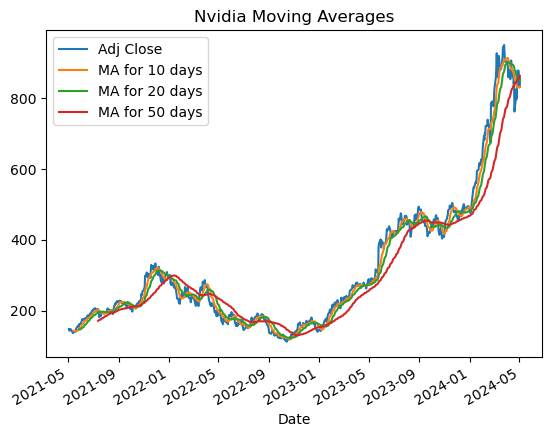

In [15]:
df_nvidia[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("Nvidia Moving Averages")

Based on the Moving Average Graph above, it can be seen that the moving average for 10 and 20 days is signaling a trend shift that connects with AMD's recent conference with investors that led to a drop in stocks by 3% for NVIDIA. 

Following the 50 day moving average, we can see that the data is doing better than the expected average aside from the sudden drop and recovery of the stock price.

## Daily Return

Text(0.5, 1.0, 'AMD Daily Return')

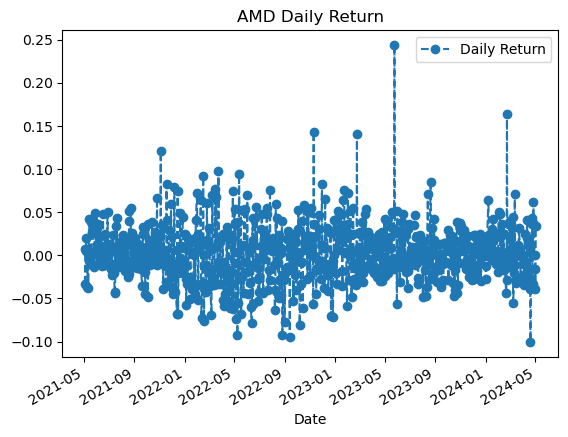

In [16]:
df_nvidia['Daily Return'] = df_nvidia['Adj Close'].pct_change()

df_nvidia['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title("AMD Daily Return")

Text(0.5, 1.0, 'Nvidia Daily Return')

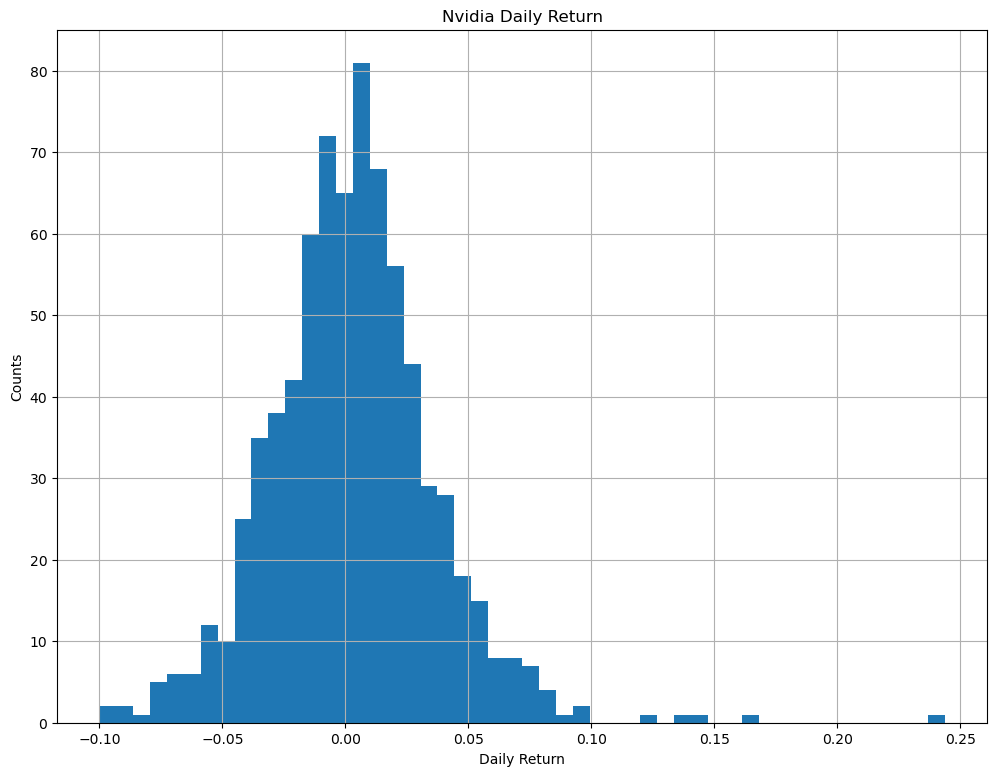

In [17]:
plt.figure(figsize=(12,9))

df_nvidia['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Nvidia Daily Return')

Daily Return is the percentage of change in a stock's price from one trading day to the next. From what can be seen, the stock's price tends to fluctuate in a narrow range on a daily basis. Increasing and decreasing approximately 5%. But overall the daily return forms a unimodal distribution.

## Risk Level

In [18]:
closing_df = pdr.get_data_yahoo(stock, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

[*********************100%%**********************]  1 of 1 completed


Text(50, 50, 'NVDA')

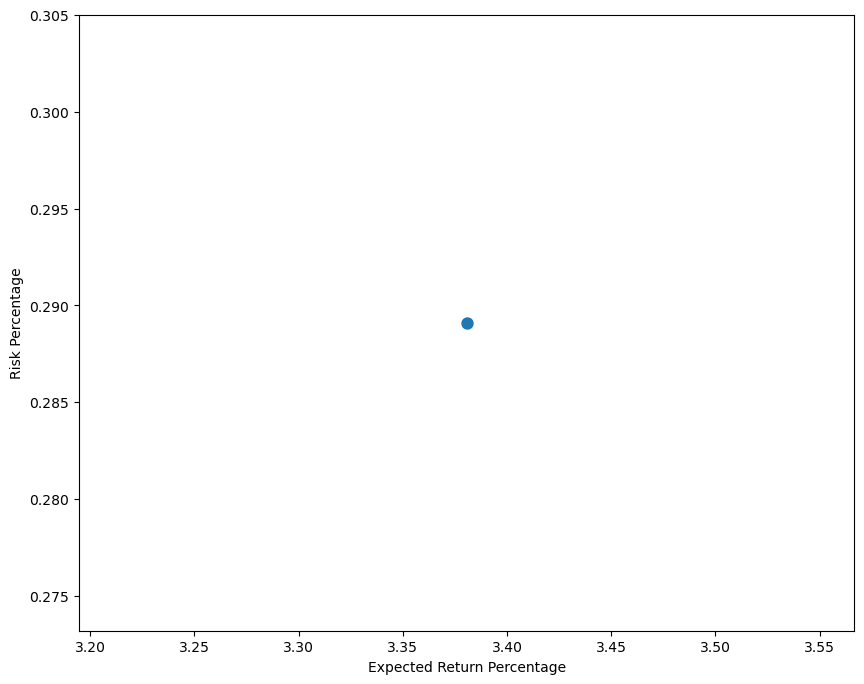

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

return_lvl = rets.mean()
return_lvl = return_lvl * 100

risk = rets.std()
risk = risk * 100

plt.figure(figsize=(10,8))
plt.scatter(risk, return_lvl, s=area)
plt.xlabel('Expected Return Percentage')
plt.ylabel('Risk Percentage')

plt.annotate(stock, xy=(rets.mean(), rets.std()), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue'))

<Axes: xlabel='Adj Close', ylabel='Volume'>

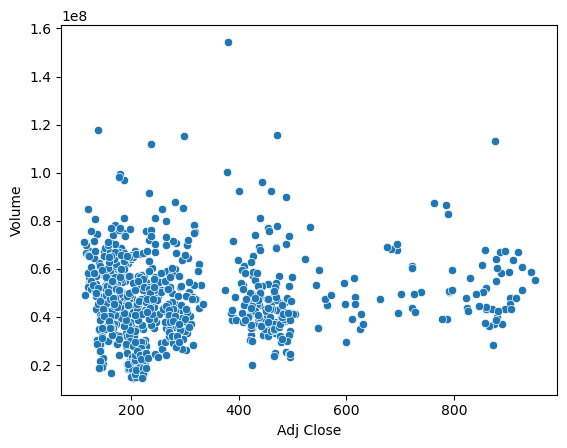

In [20]:
sns.scatterplot(df_nvidia, x='Adj Close', y='Volume')

High volume of trades were in the lower area, but sudden rise mainly occurred during 2023. The highest volume of purchases during a trading session happening when stock price was below 400 dollars, less trades seemed to occur after.

## Prediction Model

In [21]:
start = datetime(end.year - 5, end.month, end.day)
df_nvidia = pdr.get_data_yahoo('NVDA', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


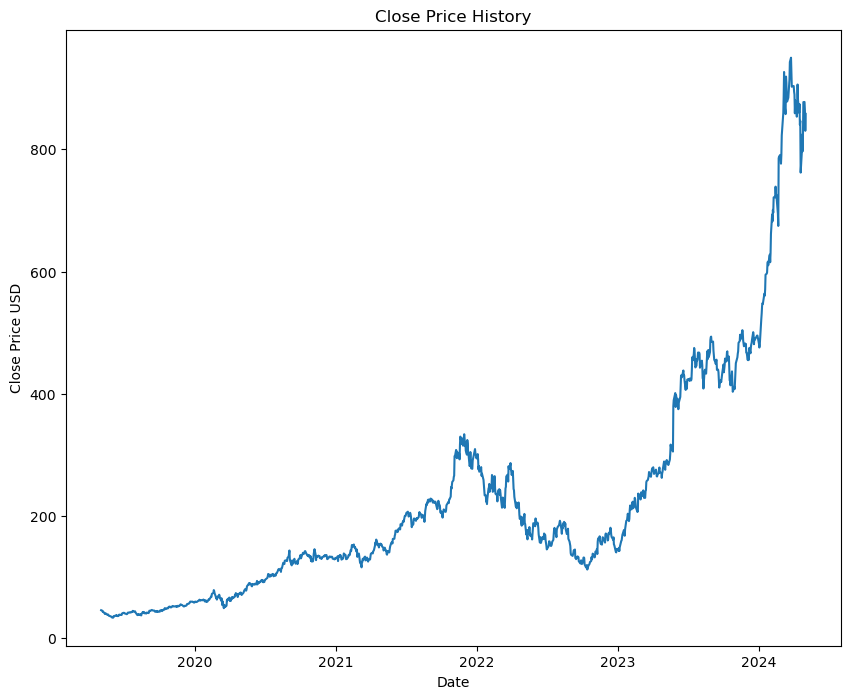

In [22]:
plt.figure(figsize=(10,8))
plt.title('Close Price History')
plt.plot(df_nvidia['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [23]:
X = df_nvidia[['High', 'Low', 'Open']]  # Features
y = df_nvidia['Close']  # Target variable

# Create new dataframe with only 'Close' column
data = df_nvidia.filter(['Close'])
# convert dataframe to numpy array
dataset = data.values
# get number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

1197

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0134277 ],
       [0.0125658 ],
       [0.01072744],
       ...,
       [0.90617244],
       [0.86950327],
       [0.89978994]])

In [25]:
window_size = 60
# Create sequences
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y)

In [26]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(window_size, 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 2s 24ms/step - loss: 0.0167 - val_loss: 0.0026
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 8.4383e-04 - val_loss: 5.3926e-04
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 5.0516e-04 - val_loss: 4.0768e-04
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 4.6510e-04 - val_loss: 3.7977e-04
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 4.3002e-04 - val_loss: 3.4057e-04
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 4.1828e-04 - val_loss: 3.2124e-04
Epoch 8/100
30/30 [==============================] - 0s 16ms/step - loss: 4.0275e-04 - val_loss: 3.3625e-04
Epoch 9/100
30/30 [==============================] - 0s 17ms/step - loss: 3.7807e-04 - val_loss: 2.9413e-04
Epoch 10/100
30/30 [========================

In [29]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 6ms/step


In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
loss = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2) Score:', r2)


8/8 [==============================] - 0s 5ms/step - loss: 1.3327e-04
Test Loss: 0.0001332732936134562
Mean Squared Error: 0.00013327325954821847
Root Mean Squared Error: 0.011544403819523054
R-squared (R2) Score: 0.9967237386799063


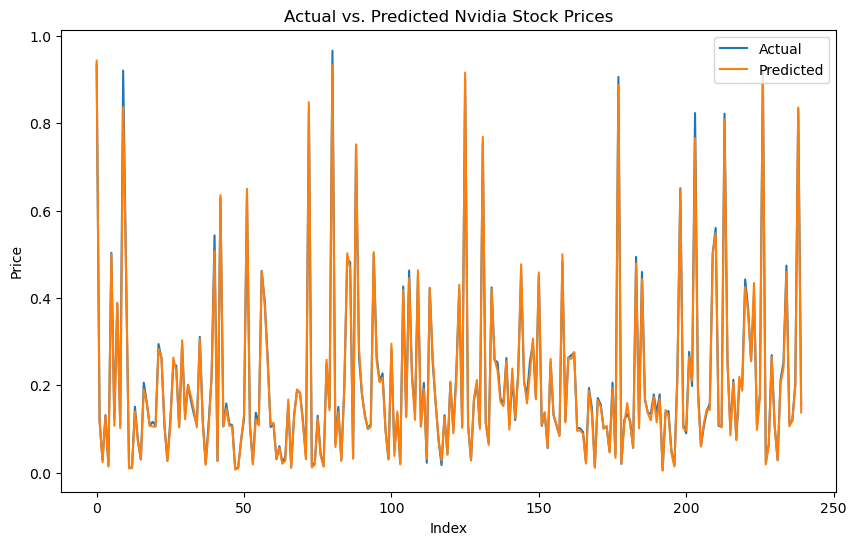

In [31]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Nvidia Stock Prices')
plt.legend()
plt.show()

In [32]:
# creating a new dataset to analyze within 60 days
test_data = scaled_data[training_data_len - 60: , :]
test_set = []
for i in range(60, len(test_data)):
    test_set.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
test_set = np.array(test_set)

# Reshape the data
test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1 ))

In [33]:
prediction = model.predict(test_set)
scaled_pred = scaler.inverse_transform(prediction)

2/2 [==============================] - 0s 12ms/step


In [34]:
# Plot the data
valid = data[training_data_len:]
valid['Predictions'] = scaled_pred

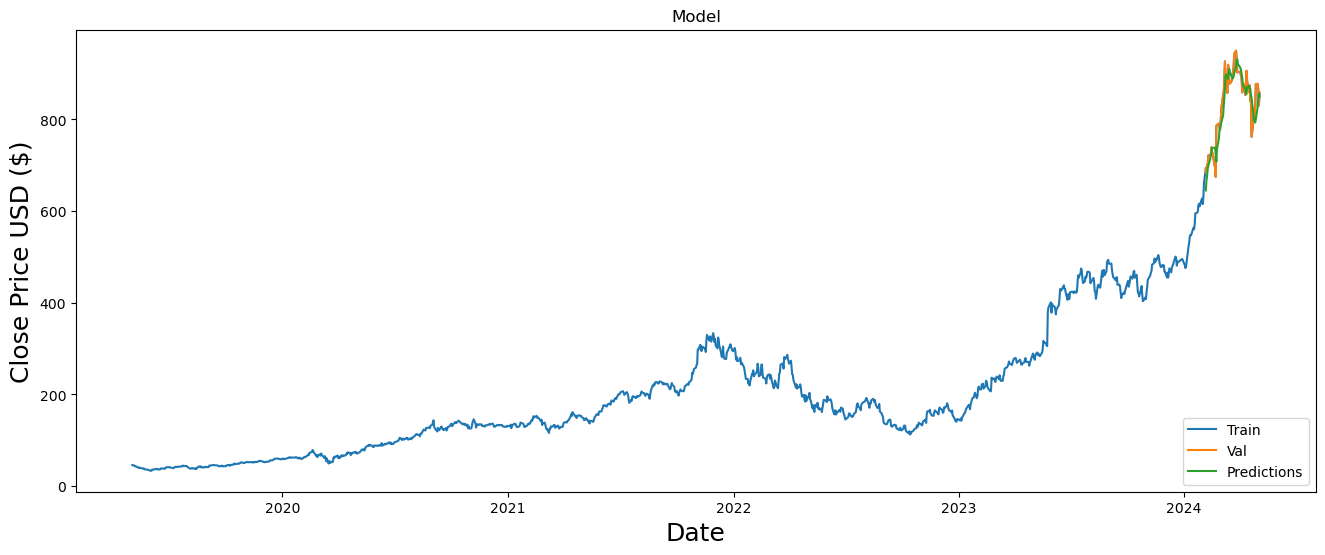

In [35]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_nvidia['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

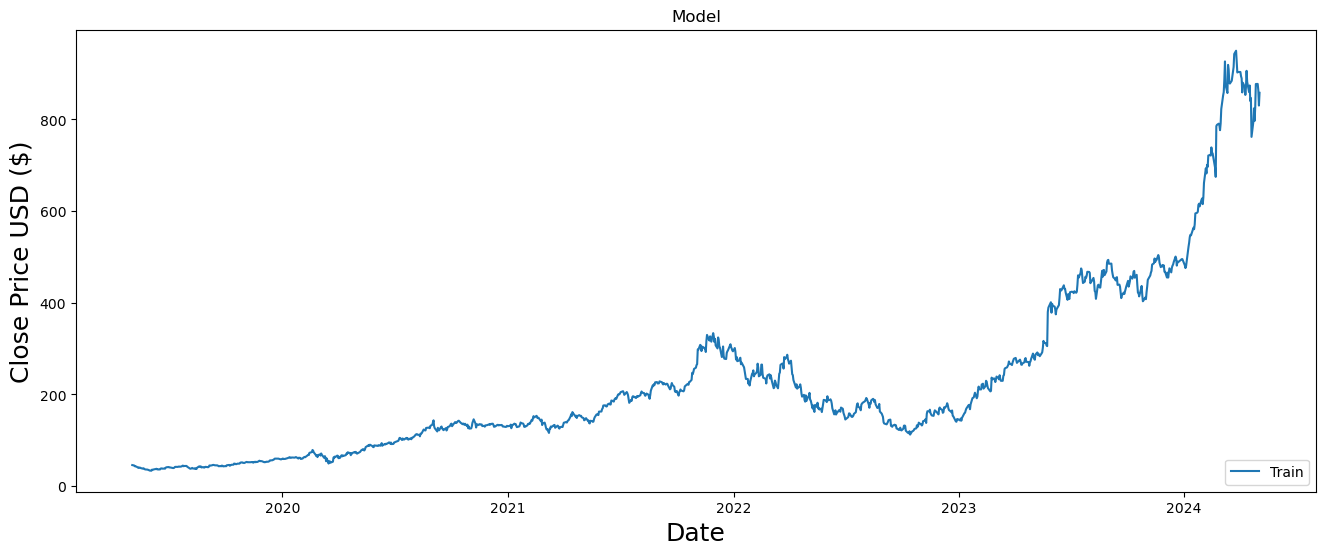

In [36]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_nvidia['Close'])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
valid

,Close,Predictions
Date,,
2024-02-05,693.320007,645.036438
2024-02-06,682.229980,666.079529
2024-02-07,700.989990,677.266724
2024-02-08,696.409973,691.399719
2024-02-09,721.330017,699.232239
...,...,...
2024-04-26,877.349976,800.856384
2024-04-29,877.570007,827.081421
2024-04-30,864.020020,847.212219


## Prediction

In [38]:
last_60_days = scaled_data[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_value = model.predict(x_predict)

predicted_decimal = scaler.inverse_transform(predicted_value)

print("Predicted Decimal Value for the Next Day:", predicted_decimal[0][0])

1/1 [==============================] - 0s 18ms/step
Predicted Decimal Value for the Next Day: 854.1767


In [39]:
future_days = 5

last_60_days = scaled_data[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_values = []
for _ in range(future_days):
    # Predict the next day
    predicted_value = model.predict(x_predict)
    predicted_decimal = scaler.inverse_transform(predicted_value)
    
    # Store the predicted value
    predicted_values.append(predicted_decimal[0][0])
    
    # Shift the input data by one day for the next prediction
    x_predict = np.roll(x_predict, -1)
    x_predict[0, -1, 0] = predicted_value  # Replace the last value with the predicted value

print("Predicted Decimal Values for the Next", future_days, "Days:", predicted_values)

1/1 [==============================] - 0s 18ms/step
Predicted Decimal Values for the Next 5 Days: [854.1767, 855.48724, 856.38544, 856.9138, 857.10675]


Under my analysis, Nvidia would be ideal as a long-term investment. With its boom coming from the AI boom in late 2021. It has had moments of reaching lows such as in 2022 by outside factors such as the government. But early 2024 has seen the company have a large boom in its stock price, soaring to reach more than $900 dollars a few points in time in 2024. 

It may be an opportune time due to an uninspiring announcement by AMD that had also affected Nvidia too in 5/1/24, causing the stock to have a sudden drop however there is a high chance for it to continue to outperform for the rest of 2024. Predictions from the LSTM model show the stock prices already recovering. 

The stock prices will continue to rise over the demand of AI over time as Nvidia still stands in market as the forefront of the AI chip race. It seems that Nvidia will continue to rise while other companies are attempting to catch up.